# Decision Trees and Random Forests (Wildfire cause prediction)

In this lesson, we will learn about decision trees and random forests and how they can be used for supervised machine learning tasks such as classification. A decision tree is an algorithm that can be used to determine how to classify or predict a target by making sequential decisions about the values of different features associated with a sample. Random forests use the ensemble vote of many decision trees to classify or predict a value.

We will use the data set from the paper ["Inference of Wildfire Causes From Their Physical, Biological, Social and Management Attributes"](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2024EF005187) by Pourmohamad et al., Earth's Future, 2025. In this paper, they explored whether its possible to determine the cause of a wildfire (in cases where the cause is unknown) based on data from other wildfires where the cause was known. 

**References:**

[1]  Pourmohamad, Y., Abatzoglou, J. T., Fleishman, E., Short, K. C., Shuman, J., AghaKouchak, A., et al. (2025). Inference of wildfire causes from their physical, biological, social and management attributes. Earth's Future, 13, e2024EF005187. https://doi.org/10.1029/2024EF005187 

[2] Pourmohamad, Y., Abatzoglou, J. T., Belval, E. J., Fleishman, E., Short, K., Reeves, M. C., Nauslar, N., Higuera, P. E., Henderson, E., Ball, S., AghaKouchak, A., Prestemon, J. P., Olszewski, J., and Sadegh, M.: Physical, social, and biological attributes for improved understanding and prediction of wildfires: FPA FOD-Attributes dataset, Earth Syst. Sci. Data, 16, 3045–3060, https://doi.org/10.5194/essd-16-3045-2024, 2024. 

[3] Pourmohamad, Y. (2024). Inference of Wildfire Causes from Their Physical, Biological, Social and Management Attributes (0.1). Zenodo. https://doi.org/10.5281/zenodo.11510677

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

## Load in the data set

The data set can be downloaded from ["https://zenodo.org/records/11510677"](https://zenodo.org/records/11510677). 

In [2]:
!wget "https://zenodo.org/records/11510677/files/FPA_FOD_west_cleaned.csv" data/.

--2025-07-17 01:03:09--  https://zenodo.org/records/11510677/files/FPA_FOD_west_cleaned.csv


Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 139402360 (133M) [text/plain]
Saving to: ‘FPA_FOD_west_cleaned.csv’

FPA_FOD_west_cleane   0%[                    ]       0  --.-KB/s               

FPA_FOD_west_cleane   0%[                    ]  59.29K   290KB/s               

FPA_FOD_west_cleane   0%[                    ] 200.14K   493KB/s               

FPA_FOD_west_cleane   0%[                    ] 347.79K   571KB/s               

FPA_FOD_west_cleane   0%[                    ] 507.49K   612KB/s               

FPA_FOD_west_cleane   0%[                    ] 651.17K   627KB/s               

FPA_FOD_west_cleane   0%[                    ] 810.86K   645KB/s               

FPA_FOD_west_cleane   0%[                    ] 986.54K   676KB/s               

FPA_FOD_west_cleane   0%[                    ]   1.13M   699KB/s               

FPA_FOD_west_cleane   0%[                    ]   1.32M   723KB/s               

FPA_FOD_west_cleane   1%[                    ]   1.48M   729KB/s               

FPA_FOD_west_cleane   1%[                    ]   1.62M   727KB/s               

FPA_FOD_west_cleane   1%[                    ]   1.77M   731KB/s               

FPA_FOD_west_cleane   1%[                    ]   1.93M   729KB/s               

FPA_FOD_west_cleane   1%[                    ]   2.10M   736KB/s               

FPA_FOD_west_cleane   1%[                    ]   2.33M   756KB/s    eta 2m 57s 

FPA_FOD_west_cleane   1%[                    ]   2.48M   752KB/s    eta 2m 57s 

FPA_FOD_west_cleane   2%[                    ]   2.66M   758KB/s    eta 2m 57s 

FPA_FOD_west_cleane   2%[                    ]   2.83M   764KB/s    eta 2m 57s 

FPA_FOD_west_cleane   2%[                    ]   3.02M   773KB/s    eta 2m 57s 

FPA_FOD_west_cleane   2%[                    ]   3.18M   774KB/s    eta 2m 52s 

FPA_FOD_west_cleane   2%[                    ]   3.33M   796KB/s    eta 2m 52s 

FPA_FOD_west_cleane   2%[                    ]   3.52M   816KB/s    eta 2m 52s 

FPA_FOD_west_cleane   2%[                    ]   3.68M   812KB/s    eta 2m 52s 

FPA_FOD_west_cleane   2%[                    ]   3.85M   819KB/s    eta 2m 52s 

FPA_FOD_west_cleane   3%[                    ]   4.00M   822KB/s    eta 2m 49s 

FPA_FOD_west_cleane   3%[                    ]   4.28M   848KB/s    eta 2m 49s 

FPA_FOD_west_cleane   3%[                    ]   4.46M   850KB/s    eta 2m 49s 

FPA_FOD_west_cleane   3%[                    ]   4.61M   846KB/s    eta 2m 49s 

FPA_FOD_west_cleane   3%[                    ]   4.77M   839KB/s    eta 2m 49s 

FPA_FOD_west_cleane   3%[                    ]   4.92M   837KB/s    eta 2m 44s 

FPA_FOD_west_cleane   3%[                    ]   5.08M   838KB/s    eta 2m 44s 

FPA_FOD_west_cleane   3%[                    ]   5.25M   843KB/s    eta 2m 44s 

FPA_FOD_west_cleane   4%[                    ]   5.39M   844KB/s    eta 2m 44s 

FPA_FOD_west_cleane   4%[                    ]   5.56M   846KB/s    eta 2m 44s 

FPA_FOD_west_cleane   4%[                    ]   5.70M   829KB/s    eta 2m 43s 

FPA_FOD_west_cleane   4%[                    ]   5.88M   837KB/s    eta 2m 43s 

FPA_FOD_west_cleane   4%[                    ]   6.03M   834KB/s    eta 2m 43s 

FPA_FOD_west_cleane   4%[                    ]   6.20M   833KB/s    eta 2m 43s 

FPA_FOD_west_cleane   4%[                    ]   6.33M   828KB/s    eta 2m 43s 

FPA_FOD_west_cleane   4%[                    ]   6.50M   832KB/s    eta 2m 43s 

FPA_FOD_west_cleane   5%[>                   ]   6.66M   822KB/s    eta 2m 43s 

FPA_FOD_west_cleane   5%[>                   ]   6.81M   818KB/s    eta 2m 43s 

FPA_FOD_west_cleane   5%[>                   ]   6.97M   817KB/s    eta 2m 43s 

FPA_FOD_west_cleane   5%[>                   ]   7.11M   805KB/s    eta 2m 43s 

FPA_FOD_west_cleane   5%[>                   ]   7.28M   807KB/s    eta 2m 42s 

FPA_FOD_west_cleane   5%[>                   ]   7.43M   770KB/s    eta 2m 42s 

FPA_FOD_west_cleane   5%[>                   ]   7.59M   777KB/s    eta 2m 42s 

FPA_FOD_west_cleane   5%[>                   ]   7.75M   777KB/s    eta 2m 42s 

FPA_FOD_west_cleane   5%[>                   ]   7.96M   786KB/s    eta 2m 42s 

FPA_FOD_west_cleane   6%[>                   ]   8.17M   794KB/s    eta 2m 40s 

FPA_FOD_west_cleane   6%[>                   ]   8.32M   797KB/s    eta 2m 40s 

FPA_FOD_west_cleane   6%[>                   ]   8.48M   794KB/s    eta 2m 40s 

FPA_FOD_west_cleane   6%[>                   ]   8.67M   798KB/s    eta 2m 40s 

FPA_FOD_west_cleane   6%[>                   ]   8.84M   801KB/s    eta 2m 40s 

FPA_FOD_west_cleane   6%[>                   ]   9.04M   816KB/s    eta 2m 38s 

FPA_FOD_west_cleane   6%[>                   ]   9.20M   815KB/s    eta 2m 38s 

FPA_FOD_west_cleane   7%[>                   ]   9.40M   824KB/s    eta 2m 38s 

FPA_FOD_west_cleane   7%[>                   ]   9.57M   829KB/s    eta 2m 38s 

FPA_FOD_west_cleane   7%[>                   ]   9.79M   842KB/s    eta 2m 38s 

FPA_FOD_west_cleane   7%[>                   ]  10.05M   869KB/s    eta 2m 33s 

FPA_FOD_west_cleane   7%[>                   ]  10.23M   856KB/s    eta 2m 33s 

FPA_FOD_west_cleane   7%[>                   ]  10.38M   859KB/s    eta 2m 33s 

FPA_FOD_west_cleane   7%[>                   ]  10.57M   872KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  10.71M   863KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  10.91M   873KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.04M   867KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.21M   871KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.38M   869KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.52M   857KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.68M   857KB/s    eta 2m 33s 

FPA_FOD_west_cleane   8%[>                   ]  11.85M   864KB/s    eta 2m 33s 

FPA_FOD_west_cleane   9%[>                   ]  12.02M   864KB/s    eta 2m 33s 

FPA_FOD_west_cleane   9%[>                   ]  12.14M   855KB/s    eta 2m 33s 

FPA_FOD_west_cleane   9%[>                   ]  12.30M   852KB/s    eta 2m 33s 

FPA_FOD_west_cleane   9%[>                   ]  12.52M   857KB/s    eta 2m 31s 

FPA_FOD_west_cleane   9%[>                   ]  12.74M   857KB/s    eta 2m 31s 

FPA_FOD_west_cleane   9%[>                   ]  12.88M   857KB/s    eta 2m 31s 

FPA_FOD_west_cleane   9%[>                   ]  13.05M   842KB/s    eta 2m 31s 

FPA_FOD_west_cleane   9%[>                   ]  13.17M   828KB/s    eta 2m 31s 

FPA_FOD_west_cleane  10%[=>                  ]  13.38M   830KB/s    eta 2m 29s 

FPA_FOD_west_cleane  10%[=>                  ]  13.61M   832KB/s    eta 2m 29s 

FPA_FOD_west_cleane  10%[=>                  ]  13.78M   835KB/s    eta 2m 29s 

FPA_FOD_west_cleane  10%[=>                  ]  13.95M   832KB/s    eta 2m 29s 

FPA_FOD_west_cleane  10%[=>                  ]  14.14M   845KB/s    eta 2m 29s 

FPA_FOD_west_cleane  10%[=>                  ]  14.30M   839KB/s    eta 2m 28s 

FPA_FOD_west_cleane  10%[=>                  ]  14.50M   849KB/s    eta 2m 28s 

FPA_FOD_west_cleane  11%[=>                  ]  14.66M   845KB/s    eta 2m 28s 

FPA_FOD_west_cleane  11%[=>                  ]  14.94M   867KB/s    eta 2m 28s 

FPA_FOD_west_cleane  11%[=>                  ]  15.14M   879KB/s    eta 2m 28s 

FPA_FOD_west_cleane  11%[=>                  ]  15.31M   881KB/s    eta 2m 25s 

FPA_FOD_west_cleane  11%[=>                  ]  15.48M   886KB/s    eta 2m 25s 

FPA_FOD_west_cleane  11%[=>                  ]  15.81M   913KB/s    eta 2m 25s 

FPA_FOD_west_cleane  12%[=>                  ]  15.98M   912KB/s    eta 2m 25s 

FPA_FOD_west_cleane  12%[=>                  ]  16.15M   889KB/s    eta 2m 25s 

FPA_FOD_west_cleane  12%[=>                  ]  16.32M   884KB/s    eta 2m 24s 

FPA_FOD_west_cleane  12%[=>                  ]  16.62M   903KB/s    eta 2m 24s 

FPA_FOD_west_cleane  12%[=>                  ]  16.76M   902KB/s    eta 2m 24s 

FPA_FOD_west_cleane  12%[=>                  ]  16.93M   905KB/s    eta 2m 24s 

FPA_FOD_west_cleane  12%[=>                  ]  17.10M   900KB/s    eta 2m 24s 

FPA_FOD_west_cleane  12%[=>                  ]  17.26M   887KB/s    eta 2m 22s 

FPA_FOD_west_cleane  13%[=>                  ]  17.42M   877KB/s    eta 2m 22s 

FPA_FOD_west_cleane  13%[=>                  ]  17.65M   899KB/s    eta 2m 22s 

FPA_FOD_west_cleane  13%[=>                  ]  17.79M   885KB/s    eta 2m 22s 

FPA_FOD_west_cleane  13%[=>                  ]  17.98M   892KB/s    eta 2m 22s 

FPA_FOD_west_cleane  13%[=>                  ]  18.18M   891KB/s    eta 2m 21s 

FPA_FOD_west_cleane  13%[=>                  ]  18.34M   891KB/s    eta 2m 21s 

FPA_FOD_west_cleane  13%[=>                  ]  18.46M   884KB/s    eta 2m 21s 

FPA_FOD_west_cleane  14%[=>                  ]  18.63M   858KB/s    eta 2m 21s 

FPA_FOD_west_cleane  14%[=>                  ]  18.79M   857KB/s    eta 2m 21s 

FPA_FOD_west_cleane  14%[=>                  ]  18.99M   864KB/s    eta 2m 20s 

FPA_FOD_west_cleane  14%[=>                  ]  19.15M   863KB/s    eta 2m 20s 

FPA_FOD_west_cleane  14%[=>                  ]  19.30M   838KB/s    eta 2m 20s 

FPA_FOD_west_cleane  14%[=>                  ]  19.49M   840KB/s    eta 2m 20s 

FPA_FOD_west_cleane  14%[=>                  ]  19.66M   851KB/s    eta 2m 20s 

FPA_FOD_west_cleane  14%[=>                  ]  19.85M   860KB/s    eta 2m 19s 

FPA_FOD_west_cleane  15%[==>                 ]  20.04M   846KB/s    eta 2m 19s 

FPA_FOD_west_cleane  15%[==>                 ]  20.19M   841KB/s    eta 2m 19s 

FPA_FOD_west_cleane  15%[==>                 ]  20.38M   849KB/s    eta 2m 19s 

FPA_FOD_west_cleane  15%[==>                 ]  20.55M   853KB/s    eta 2m 19s 

FPA_FOD_west_cleane  15%[==>                 ]  20.72M   857KB/s    eta 2m 17s 

FPA_FOD_west_cleane  15%[==>                 ]  20.91M   862KB/s    eta 2m 17s 

FPA_FOD_west_cleane  15%[==>                 ]  21.06M   862KB/s    eta 2m 17s 

FPA_FOD_west_cleane  15%[==>                 ]  21.27M   861KB/s    eta 2m 17s 

FPA_FOD_west_cleane  16%[==>                 ]  21.41M   857KB/s    eta 2m 17s 

FPA_FOD_west_cleane  16%[==>                 ]  21.63M   871KB/s    eta 2m 16s 

FPA_FOD_west_cleane  16%[==>                 ]  21.80M   874KB/s    eta 2m 16s 

FPA_FOD_west_cleane  16%[==>                 ]  21.97M   859KB/s    eta 2m 16s 

FPA_FOD_west_cleane  16%[==>                 ]  22.12M   857KB/s    eta 2m 16s 

FPA_FOD_west_cleane  16%[==>                 ]  22.30M   860KB/s    eta 2m 16s 

FPA_FOD_west_cleane  16%[==>                 ]  22.47M   854KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  22.67M   860KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  22.84M   854KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  22.94M   833KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  23.15M   846KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  23.28M   825KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  23.43M   820KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  23.64M   817KB/s    eta 2m 15s 

FPA_FOD_west_cleane  17%[==>                 ]  23.79M   818KB/s    eta 2m 15s 

^C


In [3]:
data = pd.read_csv("FPA_FOD_west_cleaned.csv")

In [4]:
data.head()

,DISCOVERY_DOY,FIRE_YEAR,STATE,FIPS_CODE,NWCG_GENERAL_CAUSE,Annual_etr,Annual_precipitation,Annual_tempreture,pr,tmmn,...,GHM,NDVI-1day,NPL,Popo_1km,RPL_THEMES,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,Distance2road
0,1,2007,CA,6053.0,Misuse of fire by a minor,1625,257,286.0,0.0,276.500000,...,0.42,0.00,1.0,1.1494,0.055,0.027,0.245,0.039,0.203,43.0
1,1,2007,CA,6019.0,Arson/incendiarism,1819,383,290.0,0.0,273.200012,...,0.35,0.50,1.0,0.1652,0.525,0.719,0.499,0.302,0.405,40.2
2,1,2007,CA,6089.0,Misuse of fire by a minor,2293,985,290.0,0.0,275.100006,...,0.16,0.42,1.0,0.0504,0.476,0.635,0.516,0.002,0.581,43.8
3,1,2007,CA,6089.0,Misuse of fire by a minor,2293,985,290.0,0.0,275.100006,...,0.16,0.42,1.0,0.0504,0.476,0.635,0.516,0.002,0.581,43.8
4,1,2007,CA,6079.0,Debris and open burning,2423,102,289.0,0.0,271.299988,...,0.18,0.16,1.0,0.0718,0.295,0.309,0.321,0.105,0.313,41.0


In [5]:
data.columns

Index(['DISCOVERY_DOY', 'FIRE_YEAR', 'STATE', 'FIPS_CODE',
       'NWCG_GENERAL_CAUSE', 'Annual_etr', 'Annual_precipitation',
       'Annual_tempreture', 'pr', 'tmmn', 'vs', 'fm100', 'fm1000', 'bi', 'vpd',
       'erc', 'Elevation_1km', 'Aspect_1km', 'erc_Percentile', 'Slope_1km',
       'TPI_1km', 'EVC', 'Evacuation', 'SDI', 'FRG', 'No_FireStation_5.0km',
       'Mang_Name', 'GAP_Sts', 'GACC_PL', 'GDP', 'GHM', 'NDVI-1day', 'NPL',
       'Popo_1km', 'RPL_THEMES', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3',
       'RPL_THEME4', 'Distance2road'],
      dtype='object')

The data set includes meteorological, topological, social, and fire management variables:
- 'DISCOVERY_DOY': Day of year on which the fire was discovered or confirmed to exist
- 'FIRE_YEAR': Calendar year in which the fire was discovered or confirmed to exist
- 'STATE': Two-letter alphabetic code for the state in which the fire burned (or originated), based on fire report
- 'FIPS_CODE': Five digit code from the Federal Information Process Standards publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report.
- 'Annual_etr': Annual total reference evaporatranspiration (mm)
- 'Annual_temperature': Annual average temperature (K)
- 'pr' : Precipitation amount (mm)
- 'tmmn': Minimum temperature (K)
- 'vs': Wind velocity at 10 m above ground (m/s)
- 'fm100': 100-hour dead fuel moisture (%)
- 'fm1000': 1000-hour dead fuel moisture (%)
- 'bi': Burning index (NFDRS fire danger index)
- 'vpd': Mean vapor pressure deficit (kPa)
- 'erc': Energy release component (NFDRS fire danger index)
- 'Elevation_1km': Average elevation in 1 km radius around the ignition point
- 'Aspect_1km': Average aspect in 1 km radius around the ignition point
- 'erc_Percentile': Percentile range of energy release component
- 'Slope_1km': Average slope in 1 km radius around the ignition point
- 'TPI_1km': Average Topographic Position Index in 1 km radius around the ignition point
- 'EVC': Existing Vegetation Cover - vertically projected percent cover of the live canopy layer for a specific area (%)
- 'Evacuation': Estimate ground transport time in hours from the fire ignition point to a definitive care facility (hospital)
- 'SDI': Suppression difficulty index (Rodriguez y Silva et al. 2020): relative difficulty of fire control
- 'FRG': Fire regime group - presumed historical fire regime
- 'No_FireStation_5.0km': Number of fire stations in a 5 km radius around the fire ignition point
- 'Mang_Name': The land manager or administrative agency standardized for the US
- 'GAP_Sts': GAP status code classifies management intent to conserve biodiversity
- 'GACC_PL': Geographic Area Coordination Center (GACC) Preparedness Level
- 'GDP': Annual Gross Domestic Product Per Capita
- 'GHM': Cumulative Measure of the human modification of lands within 1 km of the fire ignition point
- 'NDVI-1day': Normalized Difference Vegetation Index (NDVI) on the day prior to ignition
- 'NPL': National Preparedness Level
- 'Popo_1km': Average population density within a 1 km radius around the fire ignition point
- 'RPL_THEMES': Social Vulnerability Index (Overall Percentile Ranking)
- 'RPL_THEME1': Percentile Ranking for socioeconomic theme summary
- 'RPL_THEME2': Percentile Ranking for Household Composition theme summary
- 'RPL_THEME3': Percentile Ranking for Minority Status/Language theme
- 'RPL_THEME4': Precentile ranking for Housing Type/Transportion theme
- 'Distance2road': Distance to the nearest road

In [6]:
len(data)

519689

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519689 entries, 0 to 519688
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DISCOVERY_DOY         519689 non-null  int64  
 1   FIRE_YEAR             519689 non-null  int64  
 2   STATE                 519689 non-null  object 
 3   FIPS_CODE             519689 non-null  float64
 4   NWCG_GENERAL_CAUSE    519689 non-null  object 
 5   Annual_etr            519689 non-null  int64  
 6   Annual_precipitation  519689 non-null  int64  
 7   Annual_tempreture     519689 non-null  float64
 8   pr                    519689 non-null  float64
 9   tmmn                  519689 non-null  float64
 10  vs                    519689 non-null  float64
 11  fm100                 519689 non-null  float64
 12  fm1000                519689 non-null  float64
 13  bi                    519689 non-null  float64
 14  vpd                   519689 non-null  float64
 15  

In [8]:
firecauses = data['NWCG_GENERAL_CAUSE'].value_counts()
print(firecauses)

NWCG_GENERAL_CAUSE
Natural                                       168349
Missing data/not specified/undetermined       150427
Equipment and vehicle use                      48994
Debris and open burning                        40516
Recreation and ceremony                        38665
Arson/incendiarism                             28090
Smoking                                        13547
Misuse of fire by a minor                      11523
Power generation/transmission/distribution      6469
Fireworks                                       6373
Railroad operations and maintenance             3074
Other causes                                    2068
Firearms and explosives use                     1594
Name: count, dtype: int64


In [9]:
## Deal with some bad data 
data.loc[data["GHM"]<0.0,"GHM"] = np.nan
data.loc[data["SDI"]<0.0,"SDI"] = np.nan
data['FRG'] = data['FRG'].replace(-9999,np.nan)
data["RPL_THEMES"] = data["RPL_THEMES"].replace(-999.0,np.nan)
data["RPL_THEME1"] = data["RPL_THEME1"].replace(-999.0,np.nan)
data["RPL_THEME2"] = data["RPL_THEME2"].replace(-999.0,np.nan)
data["RPL_THEME3"] = data["RPL_THEME3"].replace(-999.0,np.nan)
data["RPL_THEME4"] = data["RPL_THEME4"].replace(-999.0,np.nan)

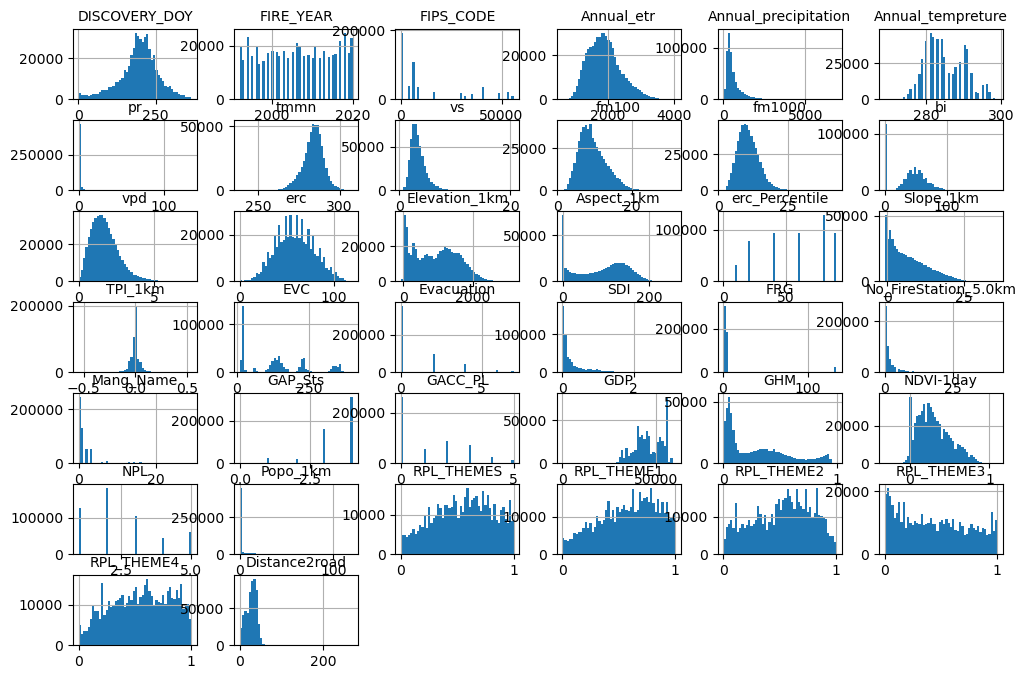

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [11]:
data_cleaned = data.dropna().reset_index(drop=True)

## Separate out the fires with no known cause
First, let's separate all of the fires where `NWCG_GENERAL_CAUSE` has the label `Missing data/not specified/undetermined`.

In [12]:
data_sorted = data_cleaned.iloc[np.where(data_cleaned['NWCG_GENERAL_CAUSE'] == 'Missing data/not specified/undetermined')[0].tolist() +
                    np.where(data_cleaned['NWCG_GENERAL_CAUSE'] != 'Missing data/not specified/undetermined')[0].tolist()].reset_index(drop=True).copy()

In [13]:
data_sorted

,DISCOVERY_DOY,FIRE_YEAR,STATE,FIPS_CODE,NWCG_GENERAL_CAUSE,Annual_etr,Annual_precipitation,Annual_tempreture,pr,tmmn,...,GHM,NDVI-1day,NPL,Popo_1km,RPL_THEMES,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,Distance2road
0,1,2007,CA,6065.0,Missing data/not specified/undetermined,2359,100,292.0,0.0,277.799988,...,0.84,0.22,1.0,5.2191,0.261,0.167,0.424,0.427,0.256,38.5
1,1,2007,CA,6065.0,Missing data/not specified/undetermined,2452,110,291.0,0.0,275.899994,...,0.61,0.17,1.0,1.3687,0.927,0.969,0.940,0.846,0.607,38.3
2,1,2007,AZ,0.0,Missing data/not specified/undetermined,3146,135,292.0,0.0,273.100006,...,0.04,0.11,1.0,0.0000,0.504,0.829,0.535,0.046,0.394,36.2
3,1,2007,CA,6065.0,Missing data/not specified/undetermined,3546,20,297.0,0.0,277.100006,...,0.92,0.04,1.0,8.1135,0.611,0.498,0.653,0.594,0.688,37.5
4,1,2007,CA,6065.0,Missing data/not specified/undetermined,2486,92,292.0,0.0,277.799988,...,0.88,0.18,1.0,13.7651,0.939,0.833,0.879,0.822,0.875,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518654,364,2003,CO,0.0,Arson/incendiarism,2222,390,284.0,0.0,263.500000,...,0.08,0.29,1.0,0.0007,0.464,0.560,0.089,0.688,0.695,16.8
518655,364,2003,CO,8043.0,Arson/incendiarism,1891,636,280.0,0.0,261.700012,...,0.06,0.37,1.0,0.0003,0.464,0.560,0.089,0.688,0.695,16.8
518656,365,2003,CA,6025.0,Recreation and ceremony,2846,63,298.0,0.0,286.500000,...,0.19,-0.00,1.0,0.0000,0.715,0.914,0.545,0.500,0.421,8.7
518657,365,2003,CA,0.0,Debris and open burning,1805,994,287.0,0.0,274.100006,...,0.39,0.02,1.0,0.4738,0.216,0.509,0.207,0.008,0.151,33.6


In [14]:
data_unknown = data_sorted.loc[data_sorted["NWCG_GENERAL_CAUSE"] == "Missing data/not specified/undetermined"].reset_index(drop=True).copy()
data_known = data_sorted.loc[data_sorted["NWCG_GENERAL_CAUSE"] != "Missing data/not specified/undetermined"].reset_index(drop=True).copy()

In [15]:
data_known["NWCG_GENERAL_CAUSE"].value_counts()

NWCG_GENERAL_CAUSE
Natural                                       168126
Equipment and vehicle use                      48895
Debris and open burning                        40450
Recreation and ceremony                        38498
Arson/incendiarism                             28035
Smoking                                        13510
Misuse of fire by a minor                      11508
Power generation/transmission/distribution      6453
Fireworks                                       6348
Railroad operations and maintenance             3062
Other causes                                    2064
Firearms and explosives use                     1584
Name: count, dtype: int64

Since only the first class is due to natural causes (typically ignition is due to lightning), and all the other categories are related to human activity, we can also label fires as being "natural" or "anthropogenic". We'll create a binary variable called "IsNatural" which has a value of 1 (True) if it is fire caused by natural causes or 0 (False) if it is a fire caused by any of the other causes related to human activity.

In [16]:
data_known["IsNatural"] = (data_known["NWCG_GENERAL_CAUSE"] == "Natural").astype(int)

In [17]:
data_known["IsNatural"].value_counts()

IsNatural
0    200407
1    168126
Name: count, dtype: int64

## Data Pre-Processing
For decision trees and random forests, we generally don't have to worry as much about scaling (compared with models like neural networks), since they work based on finding threshold values in the data sets.



In [18]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [19]:
causes = data_known[['NWCG_GENERAL_CAUSE']]
isnatural = data_known[["IsNatural"]]
features = data_known.copy().drop(["NWCG_GENERAL_CAUSE","IsNatural"],axis=1)
features_unknown = data_unknown.copy().drop(["NWCG_GENERAL_CAUSE"],axis=1)

We'll create two labels for our data set. The first is a binary label, for whether the fire was caused by natural or anthropogenic causes. 

In [20]:
y_binary = isnatural.to_numpy()

In [21]:
classnames_binary = ["Anthropogenic","Natural"]

The second set of labels will be multi-class, and include all of the possible causes for the fires included in the `NWCG_GENERAL_CAUSE` column.

In [22]:
ordenc = OrdinalEncoder()
y_multiclass = ordenc.fit_transform(causes)

In [23]:
classnames_multi = ordenc.categories_[0]
print(classnames_multi)

['Arson/incendiarism' 'Debris and open burning'
 'Equipment and vehicle use' 'Firearms and explosives use' 'Fireworks'
 'Misuse of fire by a minor' 'Natural' 'Other causes'
 'Power generation/transmission/distribution'
 'Railroad operations and maintenance' 'Recreation and ceremony' 'Smoking']


Now we will create the pipeline to transform the variables in the `features` dataframe as input to the model. 

In [24]:
categorical_cols = ["STATE"]
numerical_cols = ['DISCOVERY_DOY', 'FIRE_YEAR', 'FIPS_CODE', 'Annual_etr', 'Annual_precipitation','Annual_tempreture', 
                  'pr', 'tmmn', 'vs', 'fm100', 'fm1000', 'bi', 'vpd', 'erc', 'Elevation_1km', 'Aspect_1km', 'erc_Percentile', 
                  'Slope_1km','TPI_1km', 'EVC', 'Evacuation', 'SDI', 'FRG', 'No_FireStation_5.0km','Mang_Name', 'GAP_Sts', 
                  'GACC_PL', 'GDP', 'GHM', 'NDVI-1day', 'NPL','Popo_1km', 'RPL_THEMES', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3',
                  'RPL_THEME4', 'Distance2road']

In [25]:
cat_pipeline = make_pipeline(OrdinalEncoder(),StandardScaler())
num_pipeline = make_pipeline(StandardScaler())

In [26]:
preprocessor = ColumnTransformer([
    ("n",num_pipeline,numerical_cols),
    ("c",cat_pipeline,categorical_cols)])

In [27]:
X_known = preprocessor.fit_transform(features)

We'll use the same pipeline to transform the features associated with the unknown fires. In this case we will use `transform` rather than `fit_transform`. The difference is that the scalings and transformations will be based on the data in `features` (rather than `features_unknown`) so we will end up performing exactly the same scalings and transformations on both data sets. This is important because the models that we will train later will depend on these scalings and transformations being consistent across both data sets.

In [28]:
X_unknown = preprocessor.transform(features_unknown)

In [29]:
print(X_known.shape,X_unknown.shape)

(368533, 39) (150126, 39)


In [30]:
featurenames = preprocessor.get_feature_names_out()
print(featurenames)

['n__DISCOVERY_DOY' 'n__FIRE_YEAR' 'n__FIPS_CODE' 'n__Annual_etr'
 'n__Annual_precipitation' 'n__Annual_tempreture' 'n__pr' 'n__tmmn'
 'n__vs' 'n__fm100' 'n__fm1000' 'n__bi' 'n__vpd' 'n__erc'
 'n__Elevation_1km' 'n__Aspect_1km' 'n__erc_Percentile' 'n__Slope_1km'
 'n__TPI_1km' 'n__EVC' 'n__Evacuation' 'n__SDI' 'n__FRG'
 'n__No_FireStation_5.0km' 'n__Mang_Name' 'n__GAP_Sts' 'n__GACC_PL'
 'n__GDP' 'n__GHM' 'n__NDVI-1day' 'n__NPL' 'n__Popo_1km' 'n__RPL_THEMES'
 'n__RPL_THEME1' 'n__RPL_THEME2' 'n__RPL_THEME3' 'n__RPL_THEME4'
 'n__Distance2road' 'c__STATE']


## Training, validation, and test split

Then we will split the data where the cause of the fire is known into training, validation, and test data sets.

In [31]:
from sklearn.model_selection import train_test_split

We'll create an index z as input to the `train_test_split` function. This way, we can select either the binary or multiclass labels for our training, validation, and test data sets.

In [32]:
z_known = np.arange(0,X_known.shape[0])

In [33]:
X_train, X_val_test, z_train, z_val_test = train_test_split(X_known,z_known,test_size = 0.2, random_state = 42)
X_val, X_test, z_val, z_test = train_test_split(X_val_test, z_val_test ,test_size = 0.5, random_state = 42)

In [34]:
z_train.shape

(294826,)

In [35]:
y_multiclass_train = y_multiclass[z_train].ravel()
y_multiclass_test = y_multiclass[z_test].ravel()
y_multiclass_val = y_multiclass[z_val].ravel()

y_binary_train = y_binary[z_train].ravel()
y_binary_test = y_binary[z_test].ravel()
y_binary_val = y_binary[z_val].ravel()

In [36]:
print(X_train.shape,X_val.shape,X_test.shape)
print(y_binary_train.shape,y_binary_val.shape,y_binary_test.shape)

(294826, 39) (36853, 39) (36854, 39)
(294826,) (36853,) (36854,)


## Train logistic regression (natural vs. human causes)

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)

In [38]:
log_reg.fit(X_train, y_binary_train)

LogisticRegression(random_state=42)

In [39]:
log_reg.score(X_train,y_binary_train)

0.8811231031184495

In [40]:
log_reg.score(X_val,y_binary_val)

0.882479038341519

In [41]:
y_train_predicted = log_reg.predict(X_train)
y_val_predicted = log_reg.predict(X_val)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
confusion_matrix(y_binary_val, y_val_predicted)

array([[17695,  2302],
       [ 2029, 14827]])

In [44]:
confusion_matrix(y_binary_train, y_train_predicted)

array([[142077,  18472],
       [ 16576, 117701]])

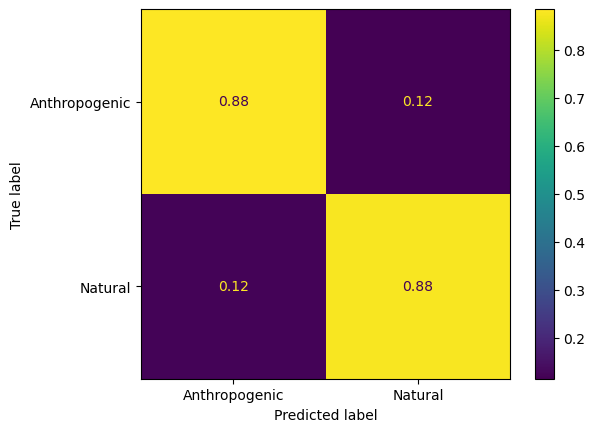

In [45]:
ConfusionMatrixDisplay.from_predictions(y_binary_train, y_train_predicted,normalize='true',display_labels=classnames_binary)

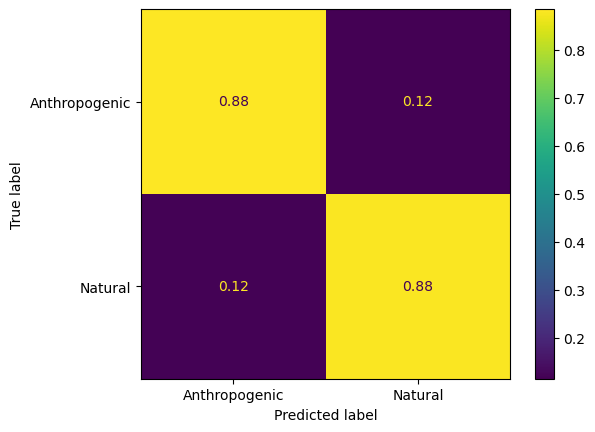

In [46]:
ConfusionMatrixDisplay.from_predictions(y_binary_val, y_val_predicted,normalize='true',display_labels=classnames_binary)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Accuracy** is defined as 

$\frac{TP+TN}{TP+TN+FP+FN}$

where
- TP = True positive
- TN = True negative
- FP = False positive
- FN = False negative

When accuracy = 1.0, this indicates a perfect classifier, while 0.0 indicates no skill. However, accuracy can be missleading if our classes are imbalanced.

In [48]:
accuracy_score(y_binary_val,y_val_predicted)

0.882479038341519

**Precision** tells us how accurately the classifier is able to identify objects of a specific class. It is defined as

$ precision = \frac{TP}{TP + FP}$.

High *precision* means that we will tolerate *false negatives*, but have as few *false positives* as possible.

In [49]:
precision_score(y_binary_val, y_val_predicted)

0.8656080331601378

**Recall** tells us how many of the objects of a class are correctly identified. It is defined as 

$recall = \frac{TP}{TP+FN}$

High *recall* means that we will tolerate *false positives*, but try to have as few *false negatives* as possible.

In [50]:
recall_score(y_binary_val, y_val_predicted)

0.8796274323682961

Finally, if we want to find a balance between precision and recall, we can evaluate the F1 score:

$F_{1} = \frac{2}{recall^{-1}+precision^{-1}}$

In [51]:
f1_score(y_binary_val, y_val_predicted)

0.8725614241577166

### ROC curve

The Reciever Operator Characteristic (ROC) curve can be used to evaluate the performance of a binary classifier. Because there is a trade-off between true positives and false positives depending on where we set the threshold for identifying the two classes, the ROC curve can visualize this trade-off. A classifier with no skill would line on the diagnol dashed line, and a perfect classifier would have a curve reaching the top-left corner of the plot.

In [52]:
from sklearn.metrics import RocCurveDisplay

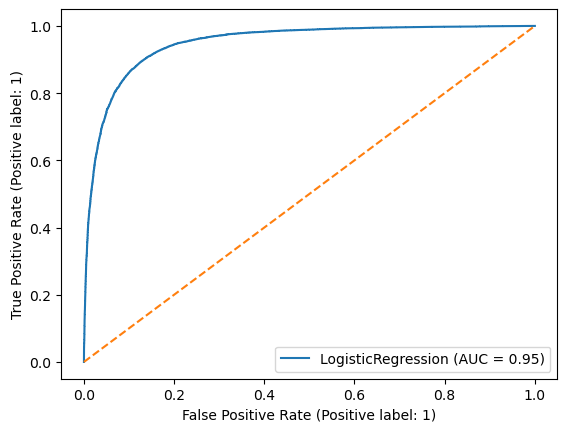

In [53]:
svc_disp = RocCurveDisplay.from_estimator(log_reg, X_val, y_binary_val)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),linestyle='--')
plt.show()

### Importance of different features for logistic regression

In [54]:
coefficients = log_reg.coef_
coefficients.shape

(1, 39)

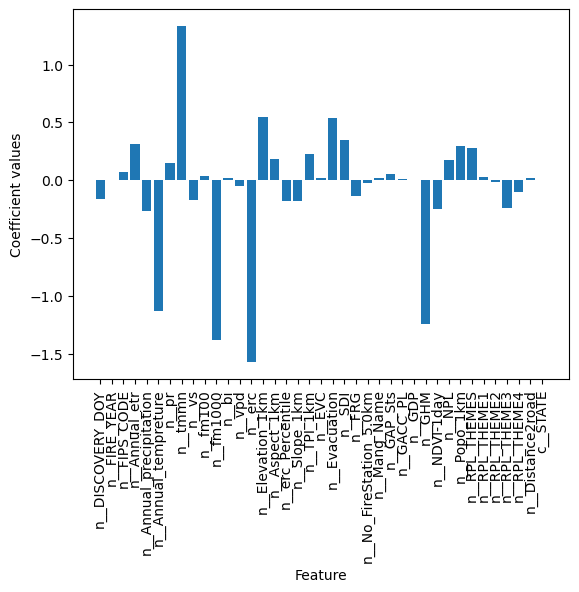

In [55]:
x = plt.bar(featurenames,coefficients[0,:])
plt.ylabel("Coefficient values")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

## Train a decision tree classifier 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_binary_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [58]:
!pip install graphviz

We can directly visualize the decision tree using the graphviz library, and look at what thresholds it is using at each node.

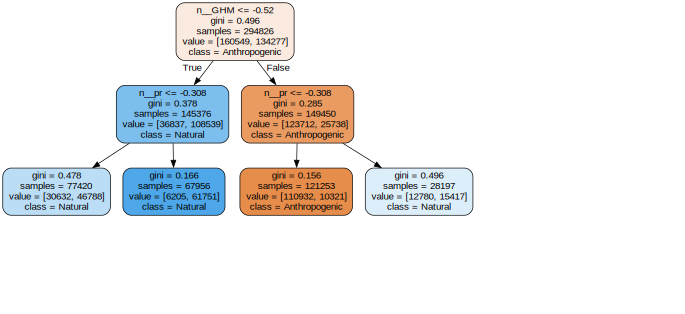

In [59]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="decision_tree.dot",
        feature_names=featurenames,
        class_names=classnames_binary,
        rounded=True,
        filled=True
    )

# Read the dot file 
with open("decision_tree.dot") as f:
    dot_graph = f.read()

# Adjust dpi for scaling
dot_graph = 'digraph Tree {\ndpi=50;\n' + dot_graph.split('\n', 1)[1]

Source(dot_graph)

Let's train decision trees with greater max_depth and see how they perform on the validation data set.

In [60]:
depths = [2,10,20,50]
trained_decisiontrees = []

for i in depths:
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    trained_decisiontrees.append(tree_clf.fit(X_train, y_binary_train))

In [61]:
y_val_predicted = trained_decisiontrees[0].predict(X_val)

In [62]:
y_val_predicted

array([1, 0, 1, ..., 1, 1, 0])

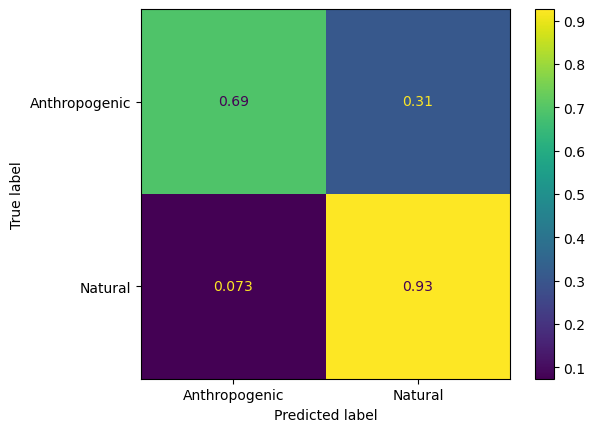

In [63]:
ConfusionMatrixDisplay.from_estimator(trained_decisiontrees[0],X_val,y_binary_val,normalize='true',display_labels=classnames_binary)

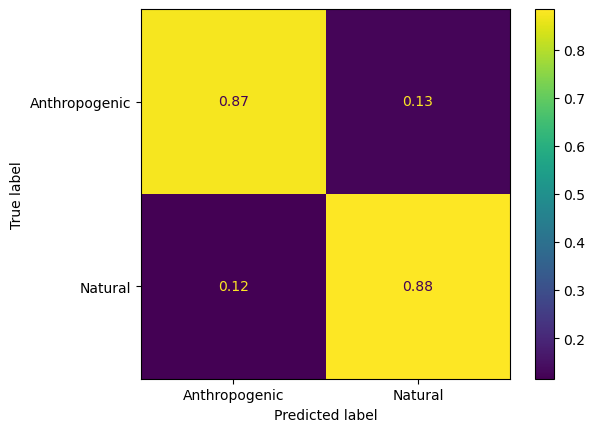

In [64]:
ConfusionMatrixDisplay.from_estimator(trained_decisiontrees[1],X_val,y_binary_val,normalize='true',display_labels=classnames_binary)

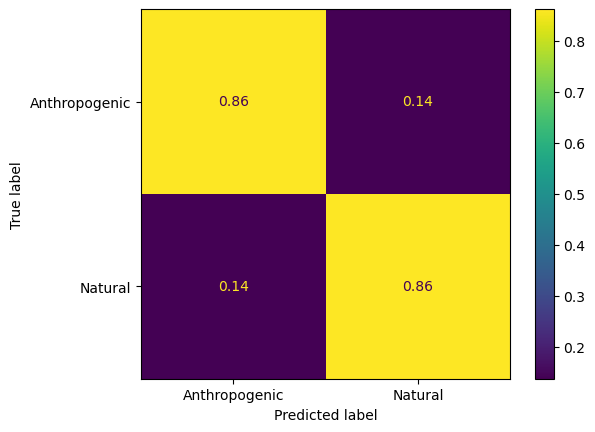

In [65]:
ConfusionMatrixDisplay.from_estimator(trained_decisiontrees[2],X_val,y_binary_val,normalize='true',display_labels=classnames_binary)

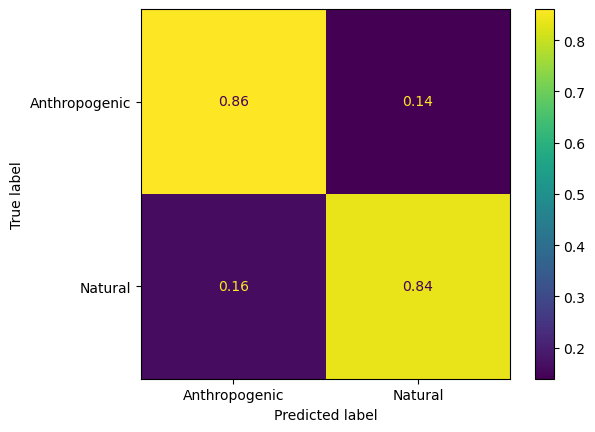

In [66]:
ConfusionMatrixDisplay.from_estimator(trained_decisiontrees[3],X_val,y_binary_val,normalize='true',display_labels=classnames_binary)

We can compare the performance of a the trained decision tree to logistic regression. 

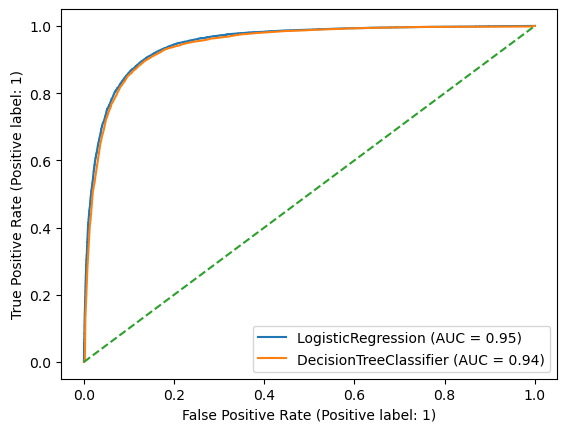

In [67]:
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(log_reg, X_val, y_binary_val,ax=ax)
svc_disp = RocCurveDisplay.from_estimator(trained_decisiontrees[1], X_val, y_binary_val,ax=ax)
ax.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),linestyle='--')
plt.show()

## Train a random forest classifier
A random forest is an ensemble of decision trees. Each decision tree is grown on a different sub-sample of the data set, and their ensemble vote is typically better than that of a single decision tree. They are quite powerful methods that are still used widely in environmental science and climate research, and are particularly good on tabular data sets. They can however be rather slow to train if the training data set is large.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
rnd_clf.fit(X_train,y_binary_train)

RandomForestClassifier(random_state=42)

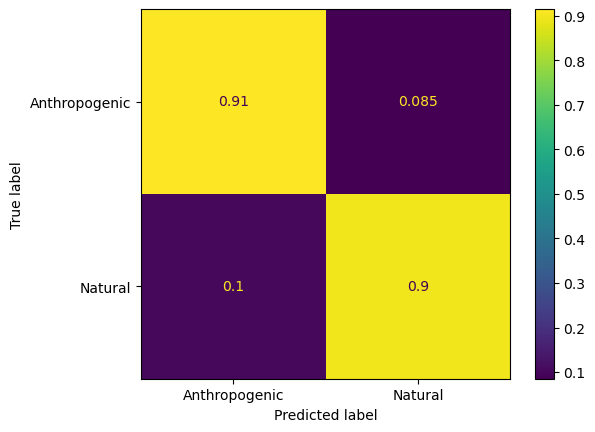

In [71]:
ConfusionMatrixDisplay.from_estimator(rnd_clf,X_val,y_binary_val,normalize='true',display_labels=classnames_binary)

We can compare the trained random forest with the decision tree and logistic regression. In this case the random forest does give us some improvement.

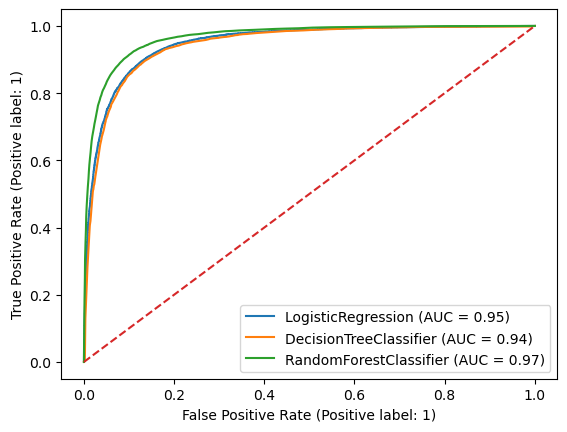

In [72]:
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(log_reg, X_val, y_binary_val,ax=ax)
svc_disp = RocCurveDisplay.from_estimator(trained_decisiontrees[1], X_val, y_binary_val,ax=ax)
svc_disp = RocCurveDisplay.from_estimator(rnd_clf, X_val, y_binary_val,ax=ax)
ax.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),linestyle='--')
plt.show()

### Feature importance
With random forests, we can also get some ideas of which features are the most important for our classifier.

In [73]:
rnd_clf.feature_importances_

array([0.03678424, 0.010523  , 0.00857334, 0.01493381, 0.01567114,
       0.02743097, 0.07660563, 0.04684962, 0.01184543, 0.01285308,
       0.01466824, 0.0617133 , 0.02268836, 0.01251963, 0.09073005,
       0.01565229, 0.00856963, 0.01815727, 0.01130637, 0.02685617,
       0.0824383 , 0.02938211, 0.00523526, 0.02220977, 0.0093963 ,
       0.02086468, 0.00383213, 0.01152713, 0.11698223, 0.01991252,
       0.02078227, 0.03123305, 0.01249902, 0.01197704, 0.01121416,
       0.01153355, 0.01094183, 0.0116142 , 0.01149288])

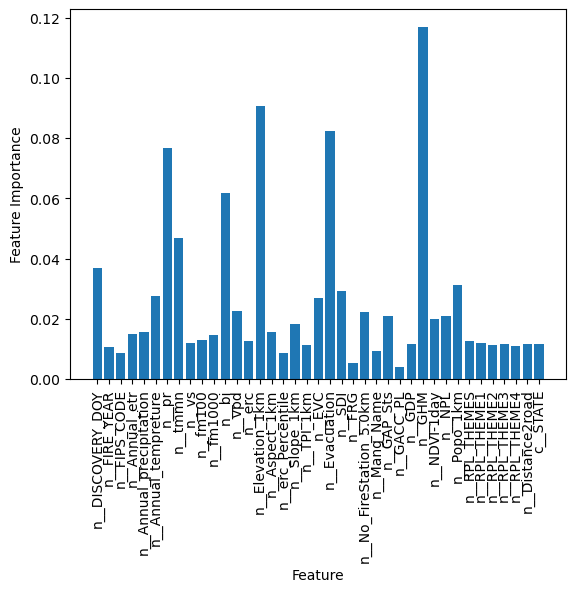

In [74]:
x = plt.bar(featurenames,rnd_clf.feature_importances_)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

### Multiclass classification with the Random Forest

In [85]:
rnd_multiclass_clf = RandomForestClassifier(n_estimators=30, random_state=42, class_weight = "balanced")

In [86]:
import time

In [87]:
start = time.time()
rnd_multiclass_clf.fit(X_train,y_multiclass_train)
end = time.time()
print(end - start)

31.467910051345825


In [88]:
# Print the depth of each tree
for i, tree in enumerate(rnd_multiclass_clf.estimators_):
    print(f"Tree {i+1}: Depth = {tree.get_depth()}")  

Tree 1: Depth = 45
Tree 2: Depth = 46
Tree 3: Depth = 49
Tree 4: Depth = 43
Tree 5: Depth = 50
Tree 6: Depth = 50
Tree 7: Depth = 48
Tree 8: Depth = 48
Tree 9: Depth = 44
Tree 10: Depth = 59
Tree 11: Depth = 50
Tree 12: Depth = 46
Tree 13: Depth = 51
Tree 14: Depth = 51
Tree 15: Depth = 43
Tree 16: Depth = 48
Tree 17: Depth = 47
Tree 18: Depth = 47
Tree 19: Depth = 46
Tree 20: Depth = 51
Tree 21: Depth = 50
Tree 22: Depth = 43
Tree 23: Depth = 44
Tree 24: Depth = 47
Tree 25: Depth = 48
Tree 26: Depth = 50
Tree 27: Depth = 48
Tree 28: Depth = 47
Tree 29: Depth = 48
Tree 30: Depth = 47


This can be slow. If we want to train a model and save the trained weights, we can use pickle so we don't need to train this again.

In [89]:
import pickle

In [90]:
filename = 'rnd_multiclass_clf.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rnd_multiclass_clf, file)

Then we can load the weights in later using the following lines.

In [91]:
loaded_model = pickle.load(open(filename, 'rb'))

We can evaluate the trained multi-class classifier.

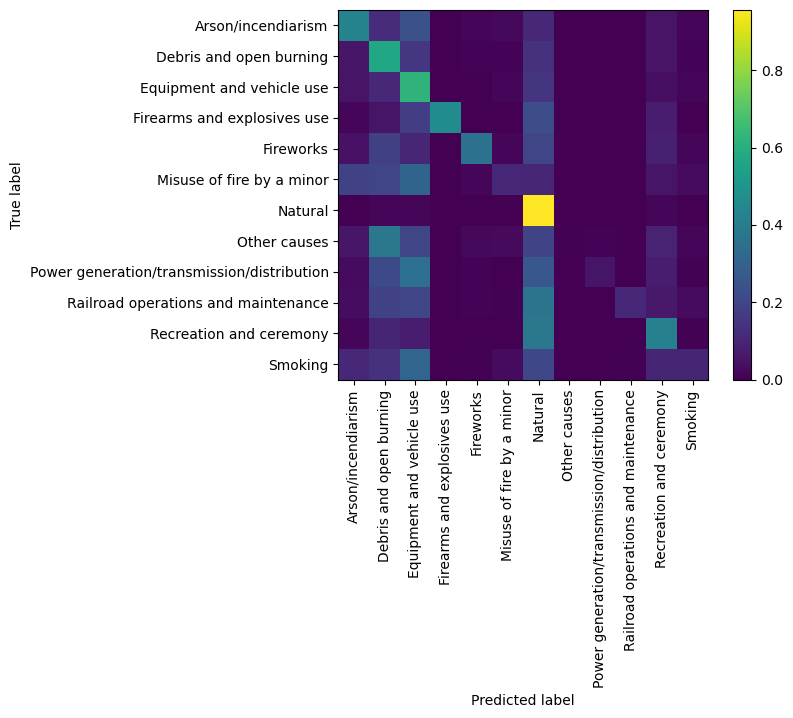

In [92]:
cmp = ConfusionMatrixDisplay.from_estimator(rnd_multiclass_clf,X_val,y_multiclass_val,normalize='true',
                                      display_labels=classnames_multi, xticks_rotation="vertical",include_values=False);

In [93]:
from sklearn.metrics import classification_report

In [94]:
y_val_predicted = rnd_multiclass_clf.predict(X_val)

In [95]:
print(classification_report(y_val_predicted,y_multiclass_val,target_names = classnames_multi))

                                            precision    recall  f1-score   support

                        Arson/incendiarism       0.43      0.53      0.47      2214
                   Debris and open burning       0.57      0.51      0.54      4606
                 Equipment and vehicle use       0.62      0.51      0.56      6016
               Firearms and explosives use       0.46      0.96      0.62        72
                                 Fireworks       0.36      0.59      0.45       389
                 Misuse of fire by a minor       0.10      0.34      0.16       354
                                   Natural       0.96      0.80      0.87     20021
                              Other causes       0.00      0.08      0.01        13
Power generation/transmission/distribution       0.05      0.49      0.10        67
       Railroad operations and maintenance       0.11      0.69      0.18        49
                   Recreation and ceremony       0.42      0.59      0.49  

The classes are pretty imbalanced, so one approach we can try is over-sampling the classes that are not well-represented.

In [96]:
!pip install imbalanced-learn

In [97]:
from imblearn.over_sampling import SMOTE

The SMOTE algorithm interpolates between the points in each class in order to create new examples similar to the training data set in order to augment the data set.

In [98]:
sm = SMOTE(random_state=42)

In [99]:
X_resampled, y_resampled = sm.fit_resample(X_train,y_multiclass_train)

This makes our data set much larger however.

In [100]:
X_resampled.shape

(1611324, 39)

In [101]:
X_resampled.shape[0]/X_train.shape[0]

5.465338877846595

We will randomly sample the resampled data set so that we will have the same size as the original training data set. 

In [103]:
z = np.arange(0,X_resampled.shape[0])
idx = np.random.choice(z, size=X_train.shape[0], replace=False)
X_balanced = X_resampled[idx]
y_balanced = y_resampled[idx]

In [105]:
rnd_multiclass_clf2 = RandomForestClassifier(n_estimators=30, random_state=42, class_weight = "balanced")

In [106]:
start = time.time()
rnd_multiclass_clf2.fit(X_balanced,y_balanced)
end = time.time()
print(end - start)

50.9616539478302


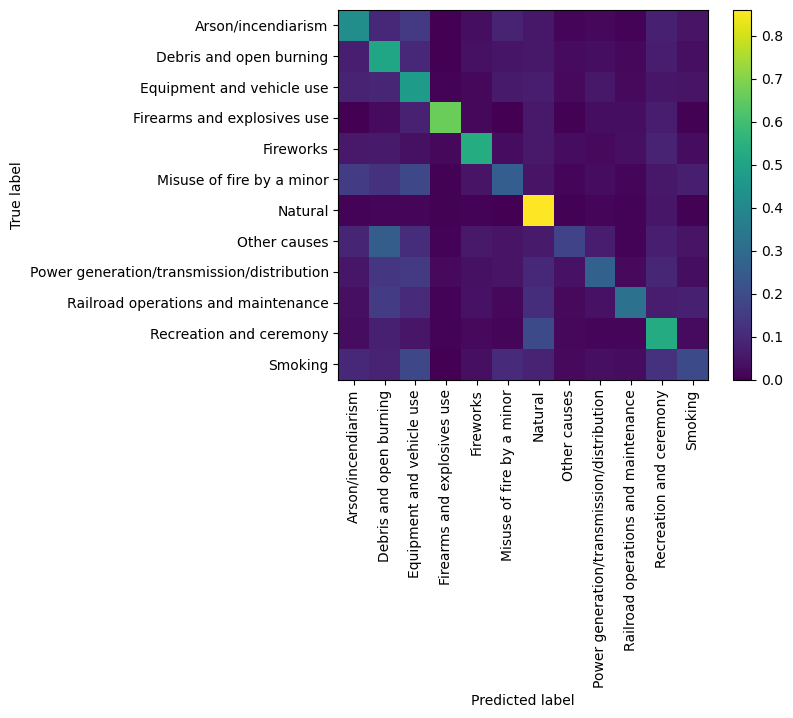

In [107]:
cmp = ConfusionMatrixDisplay.from_estimator(rnd_multiclass_clf2,X_val,y_multiclass_val,normalize='true',
                                      display_labels=classnames_multi, xticks_rotation="vertical",include_values=False);

In [108]:
y_val_predicted_oversampled = rnd_multiclass_clf2.predict(X_val)

In [109]:
print(classification_report(y_val_predicted_oversampled,y_multiclass_val,target_names = classnames_multi))

                                            precision    recall  f1-score   support

                        Arson/incendiarism       0.42      0.46      0.44      2529
                   Debris and open burning       0.51      0.54      0.52      3835
                 Equipment and vehicle use       0.47      0.54      0.51      4268
               Firearms and explosives use       0.67      0.32      0.43       314
                                 Fireworks       0.53      0.33      0.41      1050
                 Misuse of fire by a minor       0.26      0.22      0.23      1349
                                   Natural       0.86      0.89      0.88     16249
                              Other causes       0.17      0.07      0.10       507
Power generation/transmission/distribution       0.27      0.16      0.20      1004
       Railroad operations and maintenance       0.32      0.17      0.22       606
                   Recreation and ceremony       0.53      0.50      0.51  

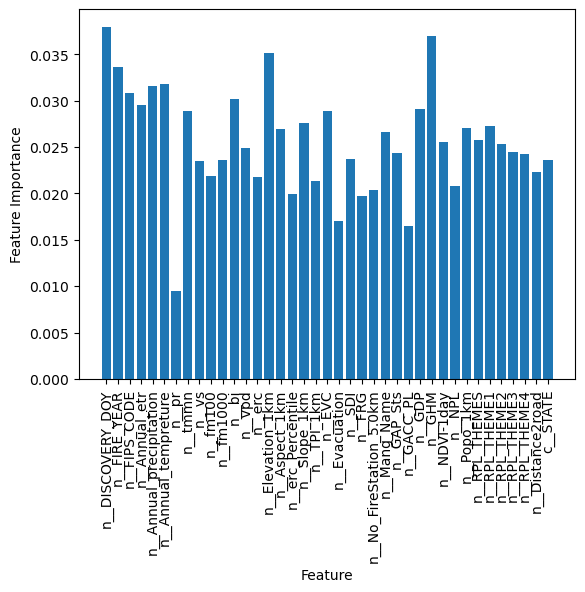

In [111]:
x = plt.bar(featurenames,rnd_multiclass_clf2.feature_importances_)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()